In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MSE
import utils

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

root_path = utils.determine_root_path()

# MSE Results

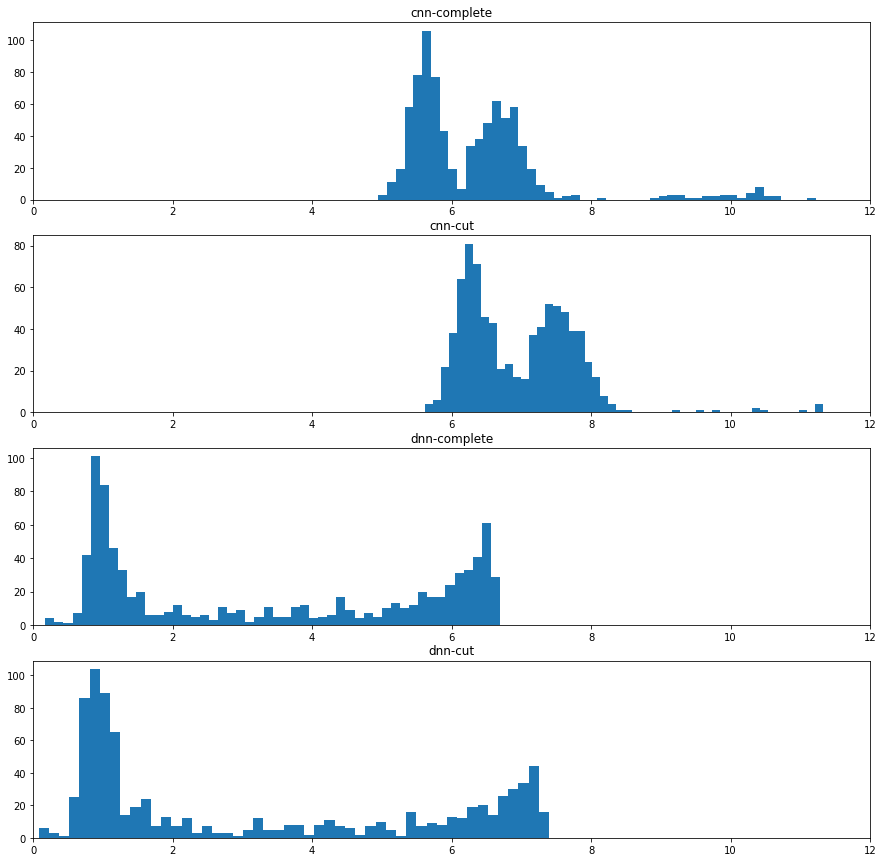

In [2]:
autoencoder_results_path = root_path.joinpath("large_autoencoder_clustering", "autoencoders_results")
model_input_types = ["cnn-complete", "cnn-cut", "dnn-complete", "dnn-cut"]

results = utils.load_autoencoder_exploration_results(path=autoencoder_results_path,
                                                     model_input_types=model_input_types)

plt.figure(figsize=(15, 15))
for i, model_input_type in enumerate(model_input_types):
    plt.subplot(4, 1, i+1)
    plt.hist(results[model_input_type], bins=50)
    plt.xlim(0, 12)
    plt.title(model_input_type)

plt.show()

# Sample Autoencoder results

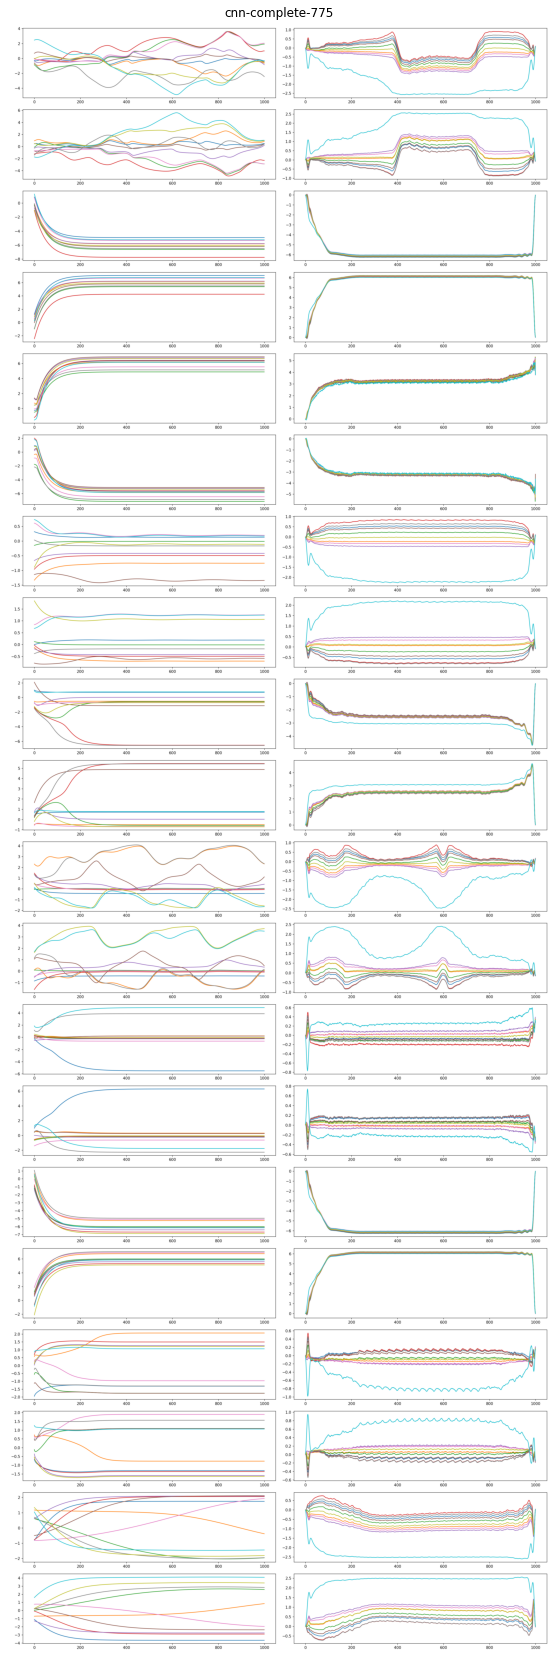

In [3]:
random_model_path = np.random.choice(list(autoencoder_results_path.iterdir()))

plt.figure(figsize=(20, 30))
plt.imshow(mpimg.imread(random_model_path.joinpath('random_predictions.png')))
plt.axis('off')
plt.title(random_model_path.name)
plt.show()

# Best Models Results

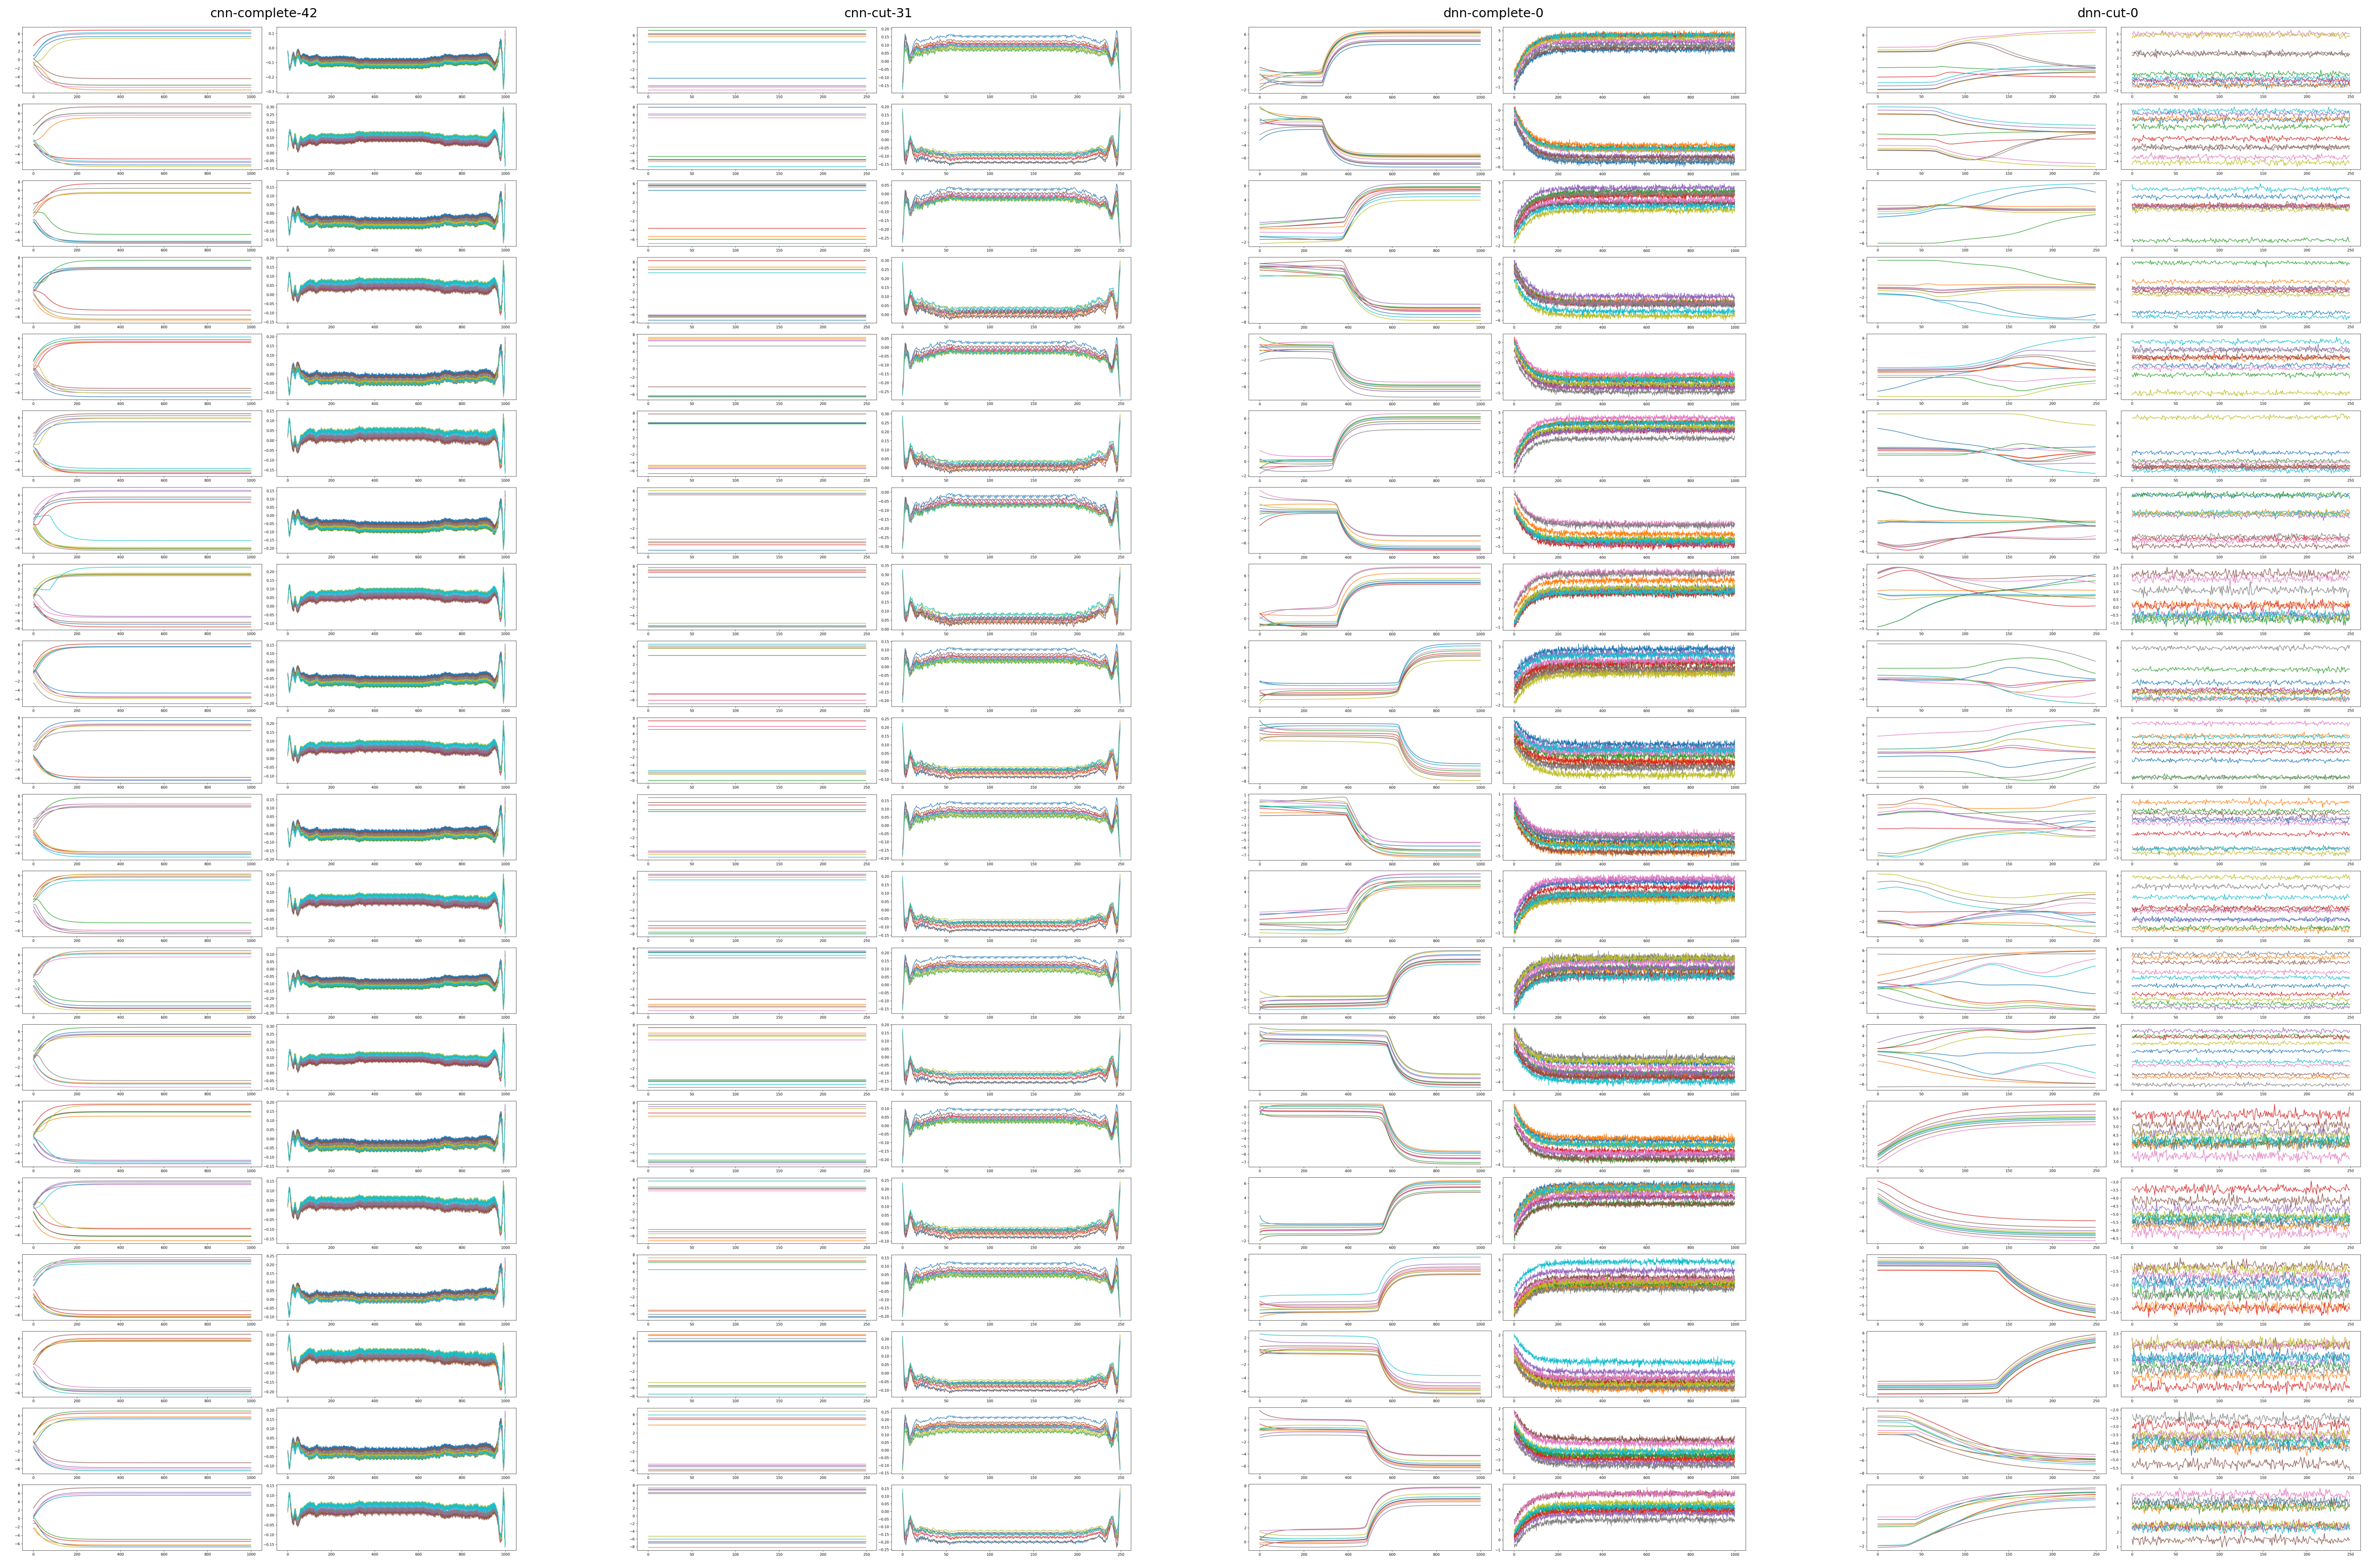

In [6]:
best_results_models = dict([(key, np.argmin(results[key])) for key in results.keys()])

plt.figure(figsize=(40, 60), dpi=150)
for i, key in enumerate(best_results_models):
    model_name = key + '-' + str(best_results_models[key])
    model_path = autoencoder_results_path.joinpath()
    plt.subplot(1, 4, i + 1)
    plt.imshow(mpimg.imread(autoencoder_results_path.joinpath(model_name, 'worst_predictions.png')))
    plt.title(model_name)
    plt.axis('off')

plt.show()

# Autoencoder n_params distribution

In [ ]:
autoencoder_clustering_path = root_path.joinpath("autoencoder_clustering")

plt.figure(figsize=(15, 15))
for i, model_input_type in enumerate(model_input_types):
    plt.subplot(4, 1, i+1)
    n_params_dist = np.load(autoencoder_clustering_path.joinpath(model_input_type + "_n_params_distribution.npy"))
    plt.hist(n_params_dist, bins=50)
    plt.xscale("log")
    plt.title("{} --- n_models: {} --- mean: {}".format(model_input_type, n_params_dist.shape[0], format(np.mean(n_params_dist), "3.2e")))
plt.show()